# CODE TO CLASSIFY IMAGES (CIFAR-10) USING CNNs

## Step 0: Problem Statement

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


## Step 1: Import Libraries/Datset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

## Step 2: Visualize data

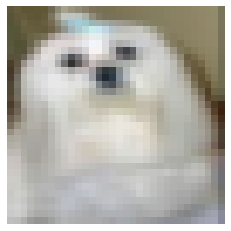

[5]


In [ ]:
i = 20001
plt.imshow(X_train[i])
plt.axis(False)
plt.show()
print(y_train[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


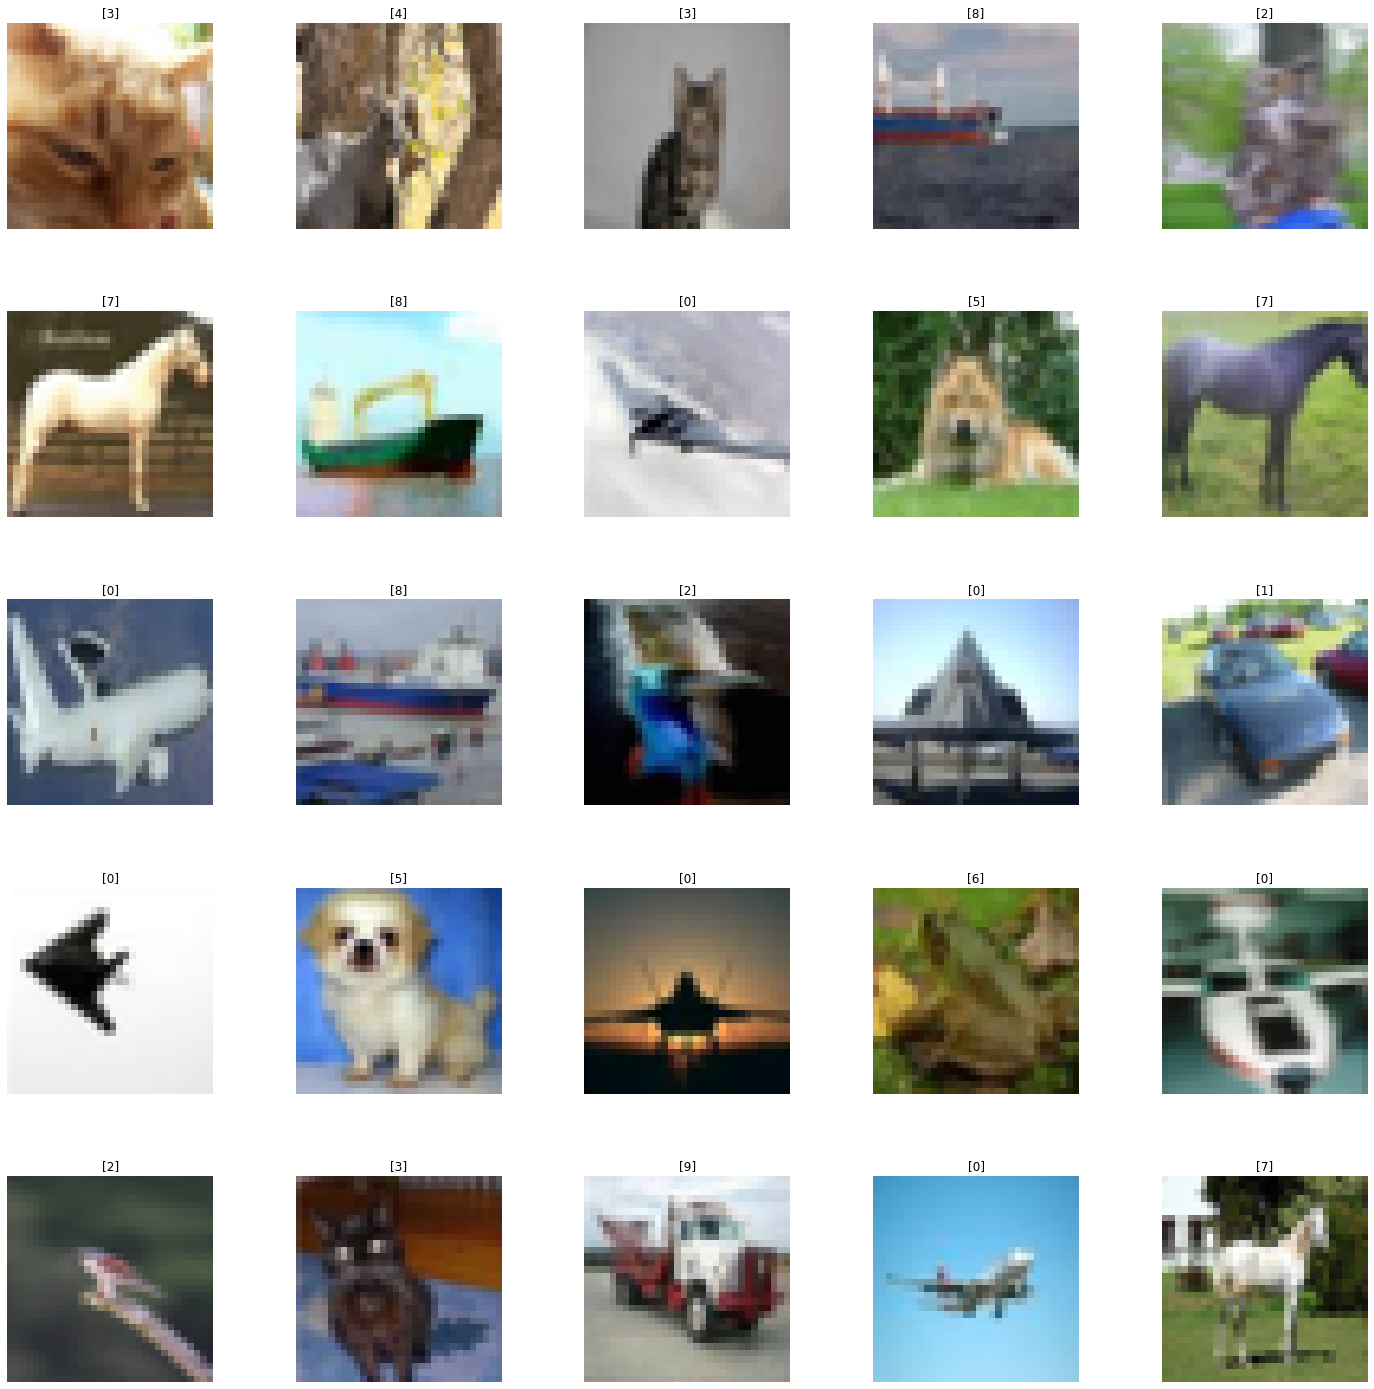

In [ ]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel()

n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

    
plt.subplots_adjust(hspace = 0.4)

## STEP 3: DATA PREPARATION

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
num_cat = 10

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train, num_cat)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = keras.utils.to_categorical(y_test, num_cat)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
INPUT_SHAPE = X_train.shape[1:]
INPUT_SHAPE

(32, 32, 3)

## STEP 4: Train the model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, \
                         Dropout, GlobalMaxPooling2D, BatchNormalization, Input
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
inputs = Input(shape=INPUT_SHAPE)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
outputs = Dense(10, activation='softmax')(x)
 
model = tf.keras.Model(inputs, outputs)
 
# model description
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    batch_size=128,
                    validation_data=(X_test, y_test),
                    shuffle=True, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/100
391/391 [==============================] - 22s 38ms/step - loss: 1.4457 - accuracy: 0.5188 - val_loss: 2.2884 - val_accuracy: 0.3281
Epoch 2/100
391/391 [==============================] - 14s 36ms/step - loss: 0.8659 - accuracy: 0.6946 - val_loss: 0.8664 - val_accuracy: 0.7046
Epoch 3/100
391/391 [==============================] - 14s 36ms/step - loss: 0.6766 - accuracy: 0.7597 - val_loss: 0.7130 - val_accuracy: 0.7538
Epoch 4/100
391/391 [==============================] - 14s 36ms/step - loss: 0.5468 - accuracy: 0.8070 - val_loss: 0.6862 - val_accuracy: 0.7640
Epoch 5/100
391/391 [==============================] - 14s 36ms/step - loss: 0.4638 - accuracy: 0.8386 - val_loss: 0.6554 - val_accuracy: 0.7799
Epoch 6/100
391/391 [==============================] - 14s 37ms/step - loss: 0.3820 - accuracy: 0.8650 - val_loss: 0.6608 - val_accuracy: 0.7843
Epoch 7/100
391/391 [==============================] - 15s 37ms/step - loss: 0.3126 - accuracy: 0.8893 - val_loss: 0.7757 - val_ac

## STEP #5: Evaluate the model

In [ ]:
evaluation = model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 3s 8ms/step - loss: 0.6554 - accuracy: 0.7799
Test Accuracy: 0.7799000144004822


In [ ]:
pred_probs = model.predict(X_test) 
y_preds = tf.argmax(pred_probs, axis=1)
y_preds

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([5, 8, 8, ..., 5, 1, 7])>

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

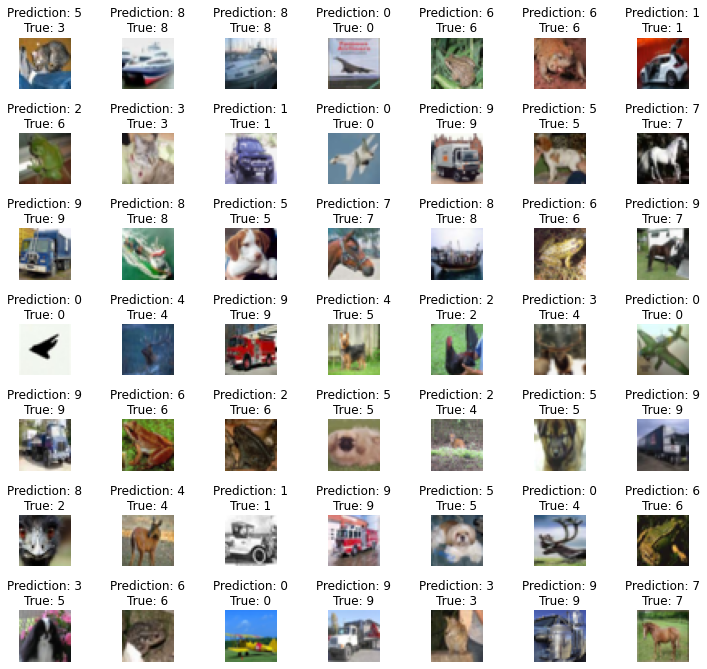

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction: {y_preds[i]}\nTrue: {y_test[i]}")
    axes[i].axis(False)

plt.subplots_adjust(wspace=1)

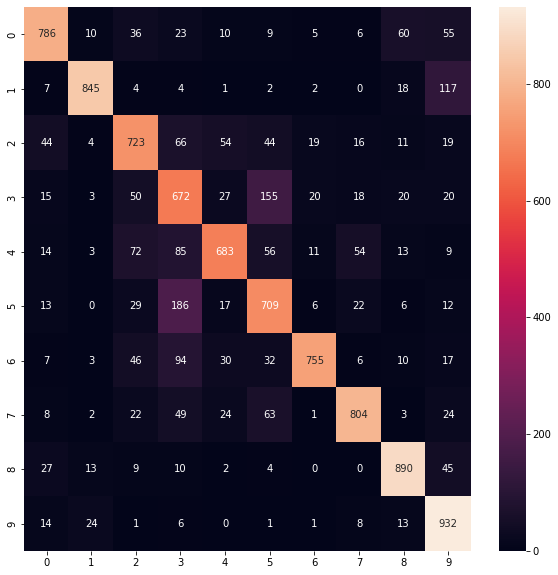

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g')
plt.show()